# HW2 Q3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio  
from sklearn.cluster import k_means
from skimage import color

(640, 960, 3)


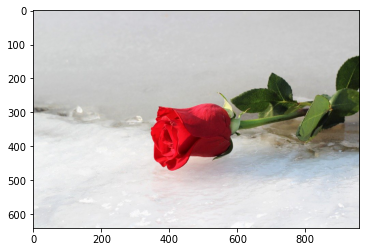

In [2]:
# Read and display image
img = imageio.imread('RoseonIce.jpg')
print(img.shape)
plt.imshow(img)

**a) Use k-means clustering to segment the image into 2, 3, 4 and 5 clusters.**

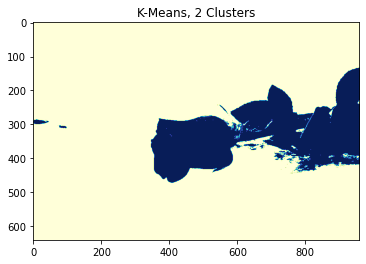

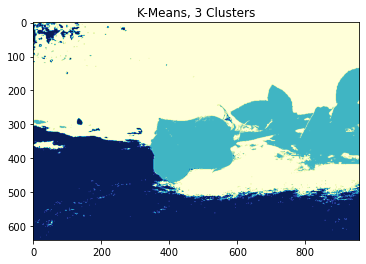

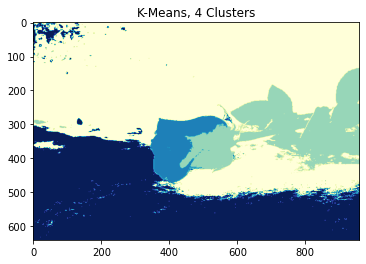

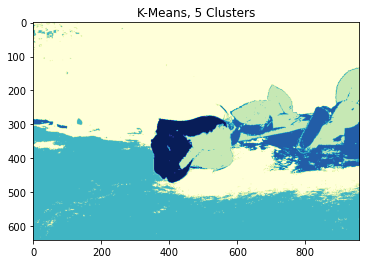

In [3]:
# Resize into single vector
img_vector = img.reshape(-1,img.shape[2]).astype(float)

# Apply kmeans 
clusters  = [2, 3, 4, 5]
for k in clusters:
    centers, res, _ = k_means(img_vector, k)
    final_img = res.reshape(img.shape[:2])
    plt.figure()
    plt.imshow(final_img, cmap='YlGnBu')
    plt.title(f'K-Means, {k} Clusters')
    plt.show()

**b) Convert the image into grayscale and plot the histogram**

(640, 960)


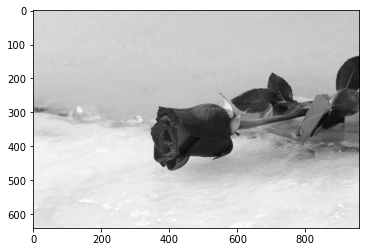

In [4]:
img_gray = color.rgb2gray(img)
print(img_gray.shape)
plt.imshow(img_gray,cmap='gray')

Text(0.5, 1.0, 'Grayscale Transformation')

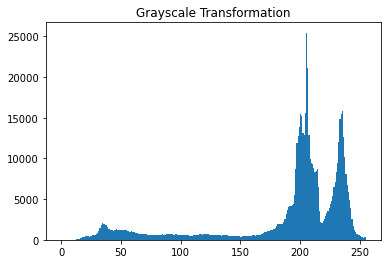

In [5]:
bins = np.arange(0, 256, 1, dtype=int)
img_gray_vect = np.round(img_gray.ravel()*255).astype(int)
b, bins, patches = plt.hist(img_gray_vect, bins=bins)
plt.title("Grayscale Transformation")

**c) Use Otsu's method to determine the optimal threshold to convert the image into black and white.**

/var/folders/2z/f9j24r0933xgycd9ssp8d6rc0000gn/T/ipykernel_91117/3451905695.py:13: RuntimeWarning: invalid value encountered in true_divide
  sigma_b_squared = (mu_t * omega - mu)**2 / (omega * (1 - omega))


Text(0.5, 1.0, "Otsu's Method Segmentation")

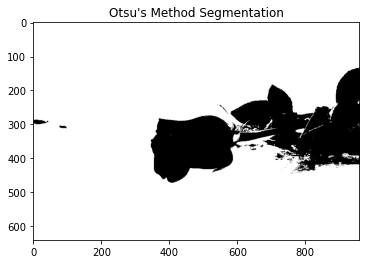

In [6]:
# Step 1: get the histogram of image
num_bins = 256
bins = np.arange(0, num_bins+1, 1, dtype=int)
hist, _ = np.histogram(img_gray_vect, bins=bins)

# Step 2: Calculate group mean
p = hist / hist.sum()
omega = np.cumsum(p)
mu = np.cumsum(p * np.arange(1, num_bins+1))
mu_t = mu[-1]

# Step 3: find the maximum value of intra-class variance 
sigma_b_squared = (mu_t * omega - mu)**2 / (omega * (1 - omega))
sigma_b_squared = sigma_b_squared[~np.isnan(sigma_b_squared)] # Remove nan values 
maxval = sigma_b_squared.max()
idx = np.argmax(sigma_b_squared)

# Step 4: Thresholding and get final image
level = (idx - 1) / (num_bins - 1)
BW = np.round(img_gray*255).astype(float) > level*num_bins
plt.figure()
plt.imshow(BW, cmap='gray')
plt.title("Otsu's Method Segmentation")

**d) Report the images obtained and the corresponding histograms. Perform log-transformation, use c=40. Display the image and its histogram.**

Text(0.5, 1.0, 'Log Transformation (c=40)')

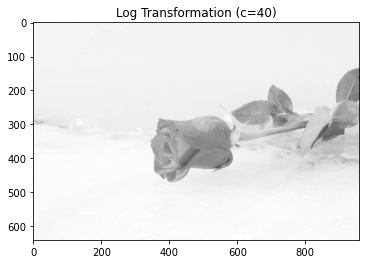

In [7]:
c = 40
img_gray_log = np.round(c*np.log(img_gray*255+1))
plt.imshow(img_gray_log, cmap='gray')
plt.title("Log Transformation (c=40)")

Text(0.5, 1.0, 'Log Transformation (c=40)')

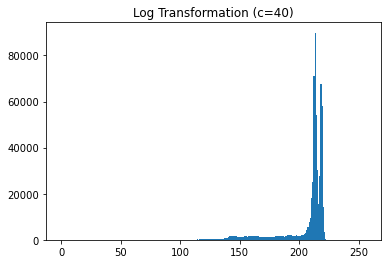

In [8]:
# Histogram
img_gray_log_vect = img_gray_log.ravel()
b, bins, patches = plt.hist(img_gray_log_vect, bins=bins)
plt.title("Log Transformation (c=40)")

**e) Perform power-law transofrmation. Use c=0.1 and $\gamma=1.4$. Display the image its histogram.**

Text(0.5, 1.0, 'Power-Law Transformation (c=0.1, g=1.4)')

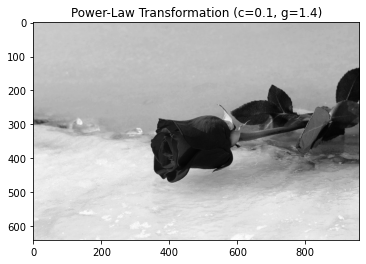

In [9]:
c = 0.1
g = 1.4
img_gray_pwr = np.round(c*((img_gray*255)**g))
plt.imshow(img_gray_pwr, cmap='gray')
plt.title("Power-Law Transformation (c=0.1, g=1.4)")

Text(0.5, 1.0, 'Power-Law Transformation (c=0.1, g=1.4)')

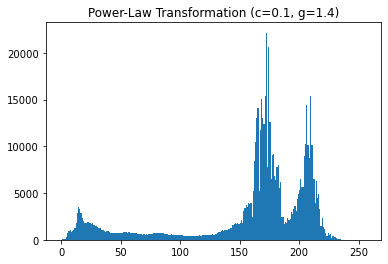

In [10]:
# Histogram
img_gray_pwr_vect = img_gray_pwr.ravel()
b, bins, patches = plt.hist(img_gray_pwr_vect, bins=bins)
plt.title("Power-Law Transformation (c=0.1, g=1.4)")